In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
import datasets

In [4]:
trex = datasets.load_dataset("json", data_files="../outputs/dataset_embeddings/from_all/trex_inverted_rdfs_len_1.jsonl", split="train")
kelm = datasets.load_dataset("json", data_files="../outputs/dataset_embeddings/from_all/kelm_inverted_rdfs_len_1.jsonl", split="train")
tekgen = datasets.load_dataset("json", data_files="../outputs/dataset_embeddings/from_all//tekgen_inverted_rdfs_len_1.jsonl", split="train")
webnlg = datasets.load_dataset("json", data_files="../outputs/dataset_embeddings/from_all//webnlg_inverted_rdfs_len_1.jsonl", split="train")

Using custom data configuration default-1eb941c6c1fe053f
Reusing dataset json (/home/teven/.cache/huggingface/datasets/json/default-1eb941c6c1fe053f/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b)
Using custom data configuration default-a4571803e28300eb
Reusing dataset json (/home/teven/.cache/huggingface/datasets/json/default-a4571803e28300eb/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b)
Using custom data configuration default-60eea486a33d7323
Reusing dataset json (/home/teven/.cache/huggingface/datasets/json/default-60eea486a33d7323/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b)
Using custom data configuration default-52b77304fac2af8a
Reusing dataset json (/home/teven/.cache/huggingface/datasets/json/default-52b77304fac2af8a/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b)


In [5]:
SYMMETRICAL_RELATIONSHIPS = [
    "taxon synonym",
    "partner in business or sport",
    "opposite of",
    "partially coincident with",
    "physically interacts with",
    "partner",
    "relative",
    "related category",
    "connects with",
    "twinned administrative body",
    "different from",
    "said to be the same as",
    "sibling",
    "adjacent station",
    "shares border with",
]

In [6]:
def plot_differences(dataset):
    plt.hist(np.array(dataset["similarity_inverted"]) - np.array(dataset["similarity"]), color = 'blue', edgecolor = 'black',
         bins = 100)

In [7]:
def difference_stats(dataset):
    differences = np.array(dataset["similarity_inverted"]) - np.array(dataset["similarity"])
    return np.mean(differences), np.std(differences), sum([1 for item in differences if item < 0]) / len(differences)

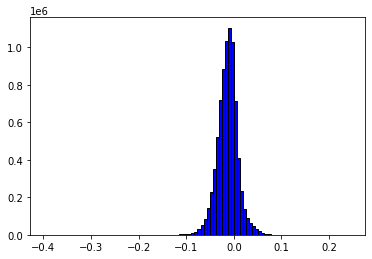

In [8]:
plot_differences(kelm)

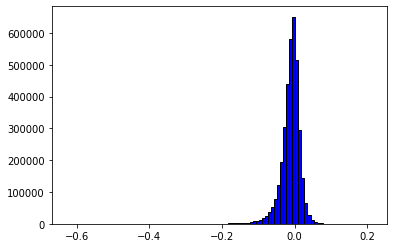

In [9]:
plot_differences(tekgen)

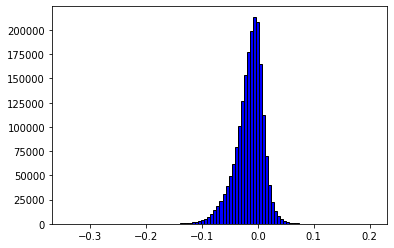

In [10]:
plot_differences(trex)

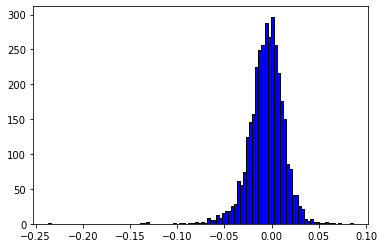

In [11]:
plot_differences(webnlg)

In [12]:
print(difference_stats(kelm))
print(difference_stats(tekgen))
print(difference_stats(trex))
print(difference_stats(webnlg))

(-0.013922849532844808, 0.02172690002462406, 0.7720972446855504)
(-0.011998092115579596, 0.027607106749601987, 0.6718468412663016)
(-0.015630826729936074, 0.02516944843544823, 0.7344790655390457)
(-0.006033763596620849, 0.018808771136959456, 0.6222794959908362)


In [13]:
bad_ind = np.argpartition(np.array(webnlg["similarity_inverted"]) - np.array(webnlg["similarity"]), -100)[-100:]

for item in webnlg.select(bad_ind):
    print(item["text"])
    print(item["triples"][0])
    print([item["triples"][0][2], item["triples"][0][1], item["triples"][0][0]])
    print(item["similarity_inverted"] - item["similarity"])
    print()
    print()
    
print(Counter([item["triples"][0][1] for item in webnlg.select(bad_ind)]))

Austin, Texas covers 686.0 square kilometres of land.
['Austin', 'landmass', '686.0 (square kilometres)']
['686.0 (square kilometres)', 'landmass', 'Austin']
0.026201128899999926


Valentina Matviyenko is a leader in Russia.
['Russia', 'head of government', 'Valentina Matviyenko']
['Valentina Matviyenko', 'head of government', 'Russia']
0.026220560100000068


The runway name of Abilene Regional Airport is 17R/35L.
['Abilene Regional Airport', 'runway', '17R/35L']
['17R/35L', 'runway', 'Abilene Regional Airport']
0.026371896200000022


The Alhambra has an 8.3m ship beam.
['Alhambra', 'beam', '8.3 m']
['8.3 m', 'beam', 'Alhambra']
0.026442766199999967


Auburn is part of Lee County, Alabama.
['Auburn', 'located in the administrative territorial entity', 'Lee County']
['Lee County', 'located in the administrative territorial entity', 'Auburn']
0.02648091320000001


The United States House of Representatives leads Anaheim, California.
['Anaheim', 'office held by head of government', 'Unite

In [14]:
good_ind = np.argpartition(np.array(webnlg["similarity_inverted"]) - np.array(webnlg["similarity"]), 100)[:100]
for item in webnlg.select(good_ind):
    print(item["text"])
    print(item["triples"][0])
    print([item["triples"][0][2], item["triples"][0][1], item["triples"][0][0]])
    print(item["similarity_inverted"] - item["similarity"])
    print()
    print()
    
print(Counter([item["triples"][0][1] for item in webnlg.select(good_ind)]))

Elliot See graduated from the University of Texas at Austin.
['Elliot See', 'educated at', 'University of Texas at Austin']
['University of Texas at Austin', 'educated at', 'Elliot See']
-0.130630374


Fountain County, Indiana is located within the United States.
['Fountain County', 'country', 'United States of America']
['United States of America', 'country', 'Fountain County']
-0.05727875230000001


Taylor County, Texas is located within the United States.
['Taylor County', 'country', 'United States of America']
['United States of America', 'country', 'Taylor County']
-0.0792751908


The ISSN number of Abhandlungen aus dem Mathematischen Seminar der Universität Hamburg is 1865-8784.
['Abhandlungen aus dem Mathematischen Seminar der Universitaet Hamburg', 'ISSN', '1865-8784']
['1865-8784', 'ISSN', 'Abhandlungen aus dem Mathematischen Seminar der Universitaet Hamburg']
-0.05453199149999999


Elliot See died on February 28,1966.
['Elliot See', 'date of death', '1966-02-28']
['1966-02-28

  0%|          | 0/100 [00:00<?, ?ba/s]

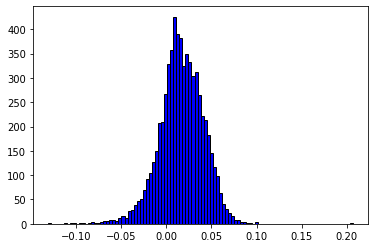

In [28]:
plot_differences(kelm.shuffle().select(range(100000)).filter(lambda x: x["triples"][0][1] == "instance of"))

  0%|          | 0/100 [00:00<?, ?ba/s]

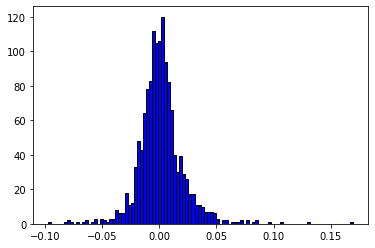

In [27]:
plot_differences(kelm.shuffle().select(range(100000)).filter(lambda x: x["triples"][0][1] == "has part"))

In [15]:
symmetrical_total = 0
total = 0
for relation in sorted([(k, v) for k, v in Counter([item["triples"][0][1] for item in kelm.shuffle().select(range(100000))]).items()], key=lambda x: x[1]):
    print(relation[0])
    print(relation[1])
    if relation[0] in SYMMETRICAL_RELATIONSHIPS:
        symmetrical_total += relation[1]
    total += relation[1]
    print()
    print()
    
print(symmetrical_total)
print(total)

Eugene ( given name ) object has role
1


Ōya Station ( Nagano ) towards
1


Kabwe Warriors F.C. start time
1


Moor Green F.C. end time
1


San Polo Parco ( Brescia Metro ) connecting line
1


Democratic Party ( Italy ) start time
1


Posey ( surname ) criterion used
1


Heartland F.C. acquisition transaction
1


IF Limhamn Bunkeflo ( men ) start time
1


Sriwijaya F.C. end time
1


location of final assembly
1


Gallantry Cross ( South Vietnam ) point in time
1


Marx ( disambiguation ) criterion used
1


William McMillan ( sculptor ) occupation
1


Showtime ( TV network ) end time
1


Alvand Hamedan F.C. end time
1


Leader of the Opposition ( United Kingdom ) end time
1


Officer ( armed forces ) start time
1


Variable ( mathematics ) latest date
1


Caballero ( cycling team ) start time
1


Shoreham F.C. start time
1


M.K. Atatürk Spor Salonu ( Tram İzmir ) connecting line
1


Odivelas F.C. acquisition transaction
1


Paul Smith ( composer ) object has role
1


Top Gear ( 2002 T



Tusker F.C. end time
1


Bayelsa United F.C. end time
1


spin quantum number
1


Harry Carey Jr . character role
1


Radical Party ( France ) point in time
1


California Dreamin ' ( disambiguation ) criterion used
1


Middle of the road ( music ) of
1


Cofidis ( cycling team ) position held
1


Minister of Transport and Communications ( Norway ) start time
1


Chengdu Tiancheng F.C. start time
1


manifestation of
1


Leader of the Opposition ( Greece ) end time
1


Beitar Nes Tubruk F.C. end time
1


Taoyuan station ( Shenzhen Metro ) connecting line
1


Ueda Station ( Nagoya ) towards
1


Porte de Clichy ( Paris Métro & RER ) connecting line
1


Glenafton Athletic F.C. start time
1


Tobago United F.C. start time
1


Clevedon Town F.C. start time
1


Brujas F.C. end time
1


Ōmachi Station ( Saga ) towards
1


Galway United F.C. start time
1


Bangor High School ( Maine ) end time
1


Leela ( name ) criterion used
1


Auchinleck Talbot F.C. end time
1


Maidstone United F.C. ( 1


Movistar Team ( men 's team ) start time
1


Milton Keynes Robins F.C. end time
1


Beaconsfield Town F.C. start time
1


Oulun Palloseura ( football ) start time
1


List of number-one country albums ( Canada ) point in time
1


Hamilton Academical F.C. acquisition transaction
1


Mosta F.C. start time
1


Kallithea F.C. acquisition transaction
1


Nonthaburi F.C. start time
1


Lothians ( Scottish Parliament electoral region ) start time
1


connector
1


Leeds United F.C. acquisition transaction
1


International Allies F.C. end time
1


Furuichi Station ( Hyōgo ) connecting line
1


Dalry Thistle F.C. start time
1


New Brighton Tower F.C. start time
1


Manchester City W.F.C. start time
1


Tiverton Town F.C. acquisition transaction
1


PKNS F.C. start time
1


Alsager Town F.C. start time
1


One ( Metallica song ) composer
1


Rayon Sports F.C. start time
1


Baltimore Orioles F.C. end time
1


Cuoiovaldarno R.F.C. start time
1


David Bradley ( English actor ) character role
1

1


Scottish Open ( snooker ) followed by
1


Bideford A.F.C. start time
1


Roanoke station ( Virginia ) direction
1


Winners Park F.C. end time
1


Buriram United F.C. end time
1


John Trevor ( died 1357 ) object has role
1


Beijing Renhe F.C. start time
1


John Bischoff ( musician ) object has role
1


Louletano D.C. start time
1


Al Merreikh SC ( Egypt ) end time
1


ONCE ( cycling team ) start time
1


Crédit Agricole ( cycling team ) end time
1


Eastwood Town F.C. acquisition transaction
1


Leeds United Women F.C. end time
1


Chancellor ( education ) start time
1


Al-Arabi ( Jordan ) end time
1


Ōizumi Station ( Mie ) towards
1


Punch ( magazine ) genre
1


Dean ( education ) of
1


commemorates
1


Qormi F.C. end time
1


Crook Town A.F.C. start time
1


Universidad del Pacífico ( Peru ) academic degree
1


Winnipeg Jets ( 1972 -- 96 ) start time
1


Kamonomiya Station ( Saitama ) towards
1


Aberystwyth Town F.C. start time
1


Gostaresh Foulad F.C. start time
1


Lu

atomic number
2


Wimbledon F.C. end time
2


ITV ( TV network ) start time
2


Morecambe F.C. start time
2


ballots cast
2


Changchun Yatai F.C. end time
2


time of spacecraft orbit decay
2


Barbarian F.C. end time
2


Chongqing Dangdai Lifan F.C. end time
2


Esporte Clube XV de Novembro ( Piracicaba ) start time
2


Closure ( business ) point in time
2


Toronto Blizzard ( 1971 -- 84 ) end time
2


Academy Award for Best Documentary ( Short Subject ) winner
2


Mercalli intensity scale
2


Harlow Town F.C. end time
2


Wroxham F.C. end time
2


dual to
2


Central F.C. start time
2


mouth of the watercourse
2


Bromley F.C. start time
2


Epoch ( astronomy ) point in time
2


St Patrick 's Athletic F.C. start time
2


Tulsa Roughnecks ( 1978 -- 84 ) start time
2


Barcelona S.C. end time
2


Altrincham F.C. acquisition transaction
2


Sudbury Town F.C. start time
2


Ajax Cape Town F.C. start time
2


endowment
2


FC Cincinnati ( 2016 -- 18 ) end time
2


Orlando Pirates F.C. 



Persepolis F.C. end time
3


solid solution series with
3


Grays Athletic F.C. end time
3


Hapoel Hadera F.C. start time
3


Egaleo F.C. end time
3


Republic of China ( 1912 -- 1949 ) start time
3


antagonist muscle
3


Calcio Foggia 1920 S.S.D. acquisition transaction
3


arterial supply
3


Dalian Shide F.C. end time
3


Total Direct Énergie ( cycling team ) start time
3


Vitória S.C. end time
3


PAS Tehran F.C. start time
3


Braintree Town F.C. start time
3


Cerro Largo F.C. start time
3


Changchun Yatai F.C. start time
3


Göztepe S.K. start time
3


America Football Club ( Rio de Janeiro ) end time
3


Solihull Moors F.C. start time
3


IDLH
3


Kavala F.C. end time
3


St Albans City F.C. start time
3


broadcast by
3


Kidderminster Harriers F.C. end time
3


UPA ( animation studio ) end time
3


PAS Hamedan F.C. end time
3


Esteghlal F.C. start time
3


Hendon F.C. end time
3


Orlando Pirates F.C. start time
3


Nelson F.C. end time
3


programming paradigm
3


She

7


IUCN protected areas category
7


headquarters location
7


discoverer or inventor
7


Paris Saint-Germain F.C. end time
7


Swansea City A.F.C. start time
7


Esteghlal F.C. end time
7


Querétaro F.C. start time
7


number of seats
7


Ipswich Town F.C. end time
7


Bradford ( Park Avenue ) A.F.C. start time
7


producer
7


Sheffield United F.C. start time
7


Municipality ( Austria ) end time
7


floors below ground
7


charted in
7


edition or translation of
7


Panathinaikos F.C. start time
7


personal best
7


Heart of Midlothian F.C. end time
7


mother
7


Rotherham United F.C. acquisition transaction
7


relegated
7


real gross domestic product growth rate
7


President ( corporate title ) end time
7


Carlisle United F.C. start time
7


Wrexham A.F.C. start time
7


Falkirk F.C. end time
7


Hibernian F.C. start time
7


Synonym ( taxonomy ) of
7


Vitória S.C. start time
7


Nuneaton Borough F.C. end time
7


Cardiff City F.C. start time
7


Sandbox-Quantity
7


Char

22


attendance
22


number of cylinders
23


visitors per year
23


legislative body
23


NMHH film rating
23


date of official opening
23


occupant
23


stock exchange
23


writing language
23


director/manager
23


child astronomical body
23


victory
23


located in or next to body of water
23


field of work
24


urban population
24


movement
24


official language
24


ICAA rating
24


readable file format
24


USK rating
24


number of representatives in an organization/legislature
25


category for members of a team
25


gross tonnage
25


hair color
25


literate population
25


start point
26


doctoral advisor
26


gens
26


input method
26


students count
26


fiscal/tax revenue
26


wheelbase
26


final event
27


home venue
27


influenced by
27


filming location
28


conflict
28


has parts of the class
28


maintained by
28


coat of arms
28


highest point
29


Highland ( council area ) object has role
29


religious order
29


ESRB rating
29


list of episodes
2

  0%|          | 0/100 [00:00<?, ?ba/s]

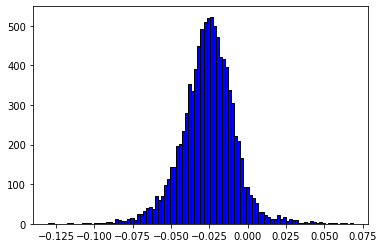

In [33]:
plot_differences(kelm.shuffle().select(range(100000)).filter(lambda x: x["triples"][0][1] == "population"))

  0%|          | 0/100 [00:00<?, ?ba/s]

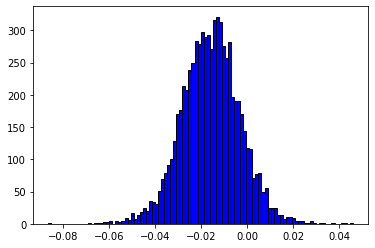

In [34]:
plot_differences(kelm.shuffle().select(range(100000)).filter(lambda x: x["triples"][0][1] == "member of sports team"))

  0%|          | 0/100 [00:00<?, ?ba/s]

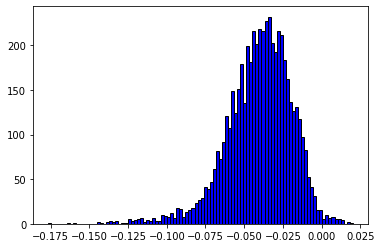

In [35]:
plot_differences(kelm.shuffle().select(range(100000)).filter(lambda x: x["triples"][0][1] == "located in time zone"))

  0%|          | 0/100 [00:00<?, ?ba/s]

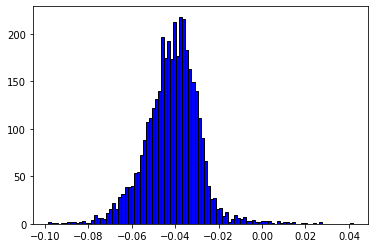

In [36]:
plot_differences(kelm.shuffle().select(range(100000)).filter(lambda x: x["triples"][0][1] == "Elo rating"))

  0%|          | 0/100 [00:00<?, ?ba/s]

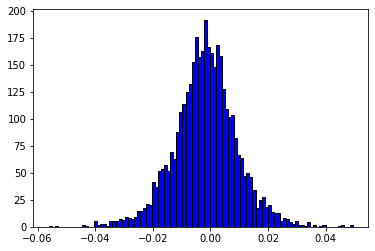

In [37]:
plot_differences(kelm.shuffle().select(range(100000)).filter(lambda x: x["triples"][0][1] == "shares border with"))

  0%|          | 0/100 [00:00<?, ?ba/s]

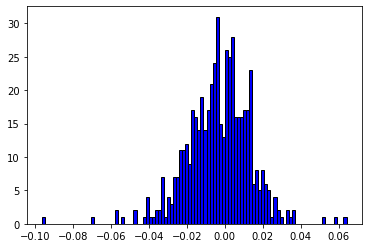

In [46]:
plot_differences(kelm.shuffle().select(range(100000)).filter(lambda x: x["triples"][0][1] == "subclass of"))

In [13]:
print(kelm.shuffle().select(range(100000)).filter(lambda x: x["triples"][0][1] == "connecting service")[2])

  0%|          | 0/100 [00:00<?, ?ba/s]

{'triples': [['Gare de Montluçon-Ville', 'connecting service', 'TER Centre-Val de Loire']], 'serialized_triples': 'Gare de Montluçon-Ville connecting service TER Centre-Val de Loire.', 'text': 'Gare de Montluçon-Ville is connected to the TER Centre-Val de Loire service.', 'rdf_linearized': '[S] Gare de Montluçon-Ville [P] connecting service [O] TER Centre-Val de Loire ', 'rdf_corrupted': '[S] Gare de Montluçon-Ville [P] connecting service [O] TER Centre-Val de Loire ', 'similarity': 0.913874507, 'rdf_inverted': '[S] TER Centre-Val de Loire [P] connecting service [O] Gare de Montluçon-Ville ', 'similarity_inverted': 0.9155406952}
